In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import datetime
def dateparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))


with open('intracity_fare_train.csv') as csvfile:
	data = pd.read_csv(csvfile,delimiter=',',parse_dates=True,date_parser=dateparse) 
	data['STARTING_LATITUDE'].fillna(data['STARTING_LATITUDE'].interpolate(),inplace=True)
	data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])
	data['TIMESTAMP'] = (data['TIMESTAMP'] - data['TIMESTAMP'].min())  / np.timedelta64(1,'D')
	data['STARTING_LONGITUDE'].fillna(data['STARTING_LONGITUDE'].interpolate(),inplace=True)
	data['DESTINATION_LATITUDE'].fillna(data['DESTINATION_LATITUDE'].interpolate(),inplace=True)
	data['DESTINATION_LONGITUDE'].fillna(data['DESTINATION_LONGITUDE'].interpolate(),inplace=True)
	data['TOTAL_LUGGAGE_WEIGHT'].fillna(0.0,inplace=True)
	data['WAIT_TIME'].fillna(0.0,inplace=True)
	#print(data.isnull().sum())

	#data['FINAL'].convert_objects(convert_numeric=True)
	#data['DIST'].convert_objects(convert_numeric=True)
	#print(data['FINAL'].convert_objects(convert_numeric=True).dtypes)
	
	for row1 in data['DIST']:
		try:
			data['DIST'].replace(row1,float(row1))
		except:
			data['DIST'].replace(row1,float())
	
	
	lbl = preprocessing.LabelEncoder()
	lbl.fit(list(data['VEHICLE_TYPE'].values))
	
	#data['FINAL'].fillna(data['FINAL'].mean(),inplace=True)
	data['DIST'].fillna(data['DIST'].mean(),inplace=True)
	data['VEHICLE_TYPE'] = lbl.transform(list(data['VEHICLE_TYPE'].values))

	y = data['FARE']
	del data['FARE']
	del data['ID']
	X = data
	print(data.info())
	
	with open('intracity_fare_test.csv') as TestData:
		data1 = pd.read_csv(TestData,delimiter=',',parse_dates=True,date_parser=dateparse)
		data1['STARTING_LATITUDE'].fillna(data1['STARTING_LATITUDE'].interpolate(),inplace=True)
		data1['TIMESTAMP'] = pd.to_datetime(data1['TIMESTAMP'])
		data1['TIMESTAMP'] = (data1['TIMESTAMP'] - data1['TIMESTAMP'].min())  / np.timedelta64(1,'D')
		data1['STARTING_LONGITUDE'].fillna(data1['STARTING_LONGITUDE'].interpolate(),inplace=True)
		data1['DESTINATION_LATITUDE'].fillna(data1['DESTINATION_LATITUDE'].interpolate(),inplace=True)
		data1['DESTINATION_LONGITUDE'].fillna(data1['DESTINATION_LONGITUDE'].interpolate(),inplace=True)
		data1['TOTAL_LUGGAGE_WEIGHT'].fillna(0.0,inplace=True)
		data1['WAIT_TIME'].fillna(0.0,inplace=True)
	
		for row1 in data1['DIST']:
			try:
				data1['DIST'].replace(row1,float(row1))
			except:
				data1['DIST'].replace(row1,float())
			
		
		#data1['FINAL'].fillna(data['FINAL'].mean(),inplace=True)
		data1['DIST'].fillna(data['DIST'].mean(),inplace=True)
		
		lbl1 = preprocessing.LabelEncoder()
		lbl1.fit(list(data1['VEHICLE_TYPE'].values))
		data1['VEHICLE_TYPE'] = lbl1.transform(list(data1['VEHICLE_TYPE'].values))
		
		del data1['ID']
		print(data1.info())
		
		from sklearn import ensemble
		reg = ensemble.GradientBoostingRegressor(max_depth=7)
		reg.fit(X ,y)	
		prediction = reg.predict(data1)
		#from sklearn.metrics import r2_score
		#print(r2_score(y_test,prediction))
		with open('result.csv',"w") as f:
			writer = csv.writer(f)
			ps = ['ID','FARE']
			writer.writerow(ps)
			
			x=1
			for Row in prediction:
				writer.writerow([x,Row])
				x += 1
			

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
TIMESTAMP                20000 non-null float64
STARTING_LATITUDE        20000 non-null float64
STARTING_LONGITUDE       20000 non-null float64
DESTINATION_LATITUDE     20000 non-null float64
DESTINATION_LONGITUDE    20000 non-null float64
VEHICLE_TYPE             20000 non-null int64
TOTAL_LUGGAGE_WEIGHT     20000 non-null float64
WAIT_TIME                20000 non-null float64
TRAFFIC_STUCK_TIME       20000 non-null int64
DISTANCE                 20000 non-null int64
DIST                     20000 non-null float64
dtypes: float64(8), int64(3)
memory usage: 1.7 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
TIMESTAMP                20000 non-null float64
STARTING_LATITUDE        20000 non-null float64
STARTING_LONGITUDE       20000 non-null float64
DESTINATION_LATITUDE     20000 non-null float64
DESTINATION_L

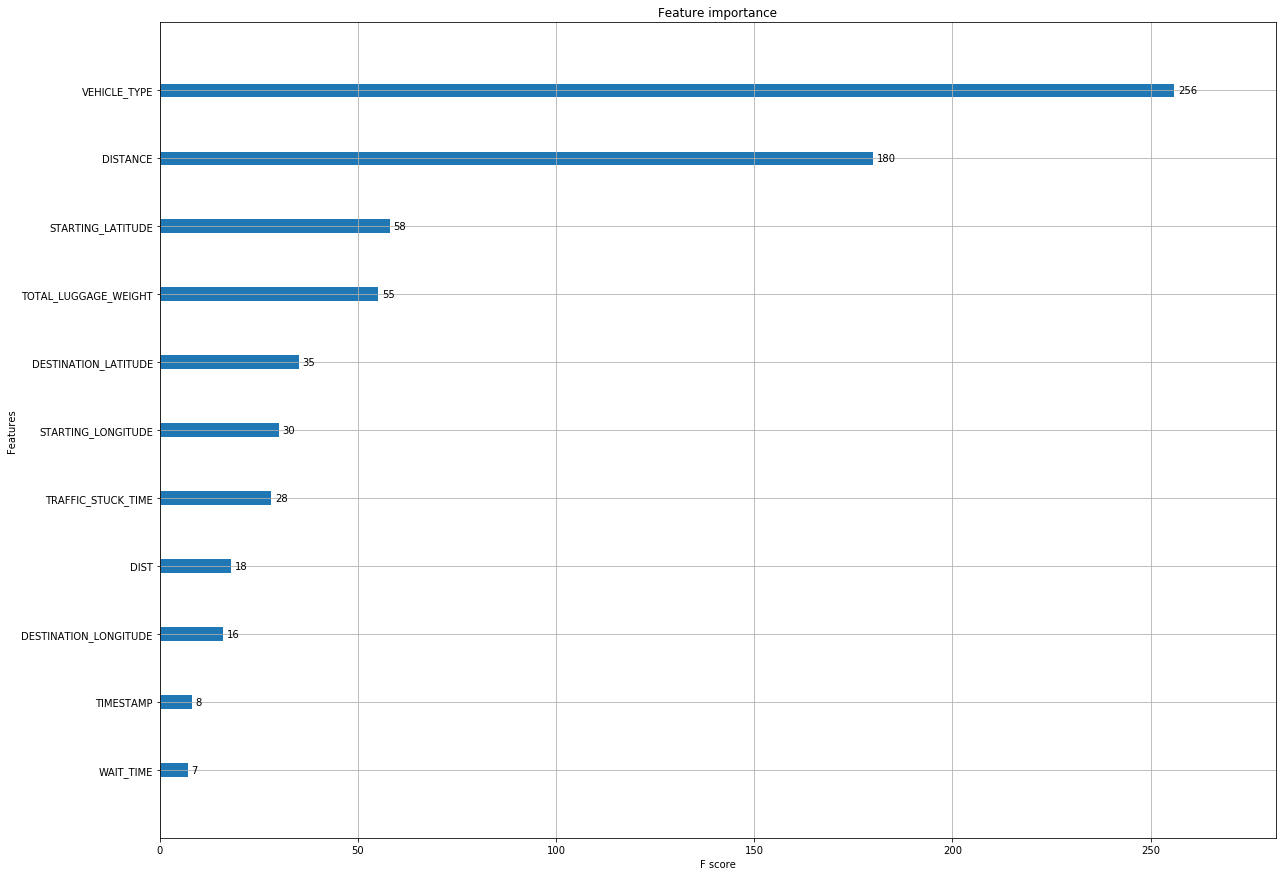

train set


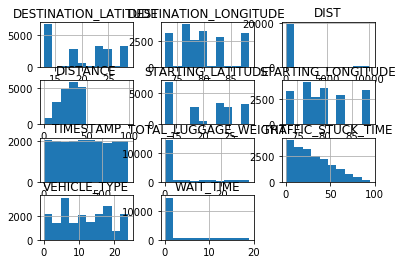

test set


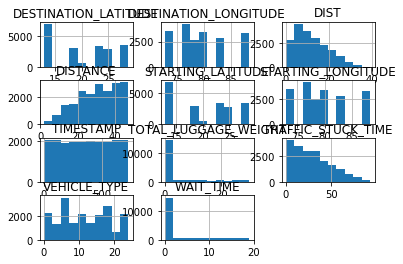

train set


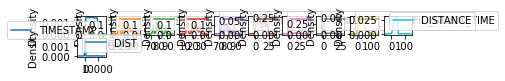

test set


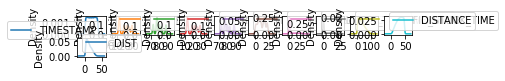

train set


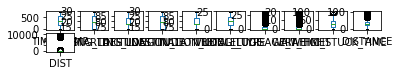

test set


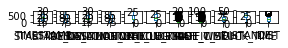

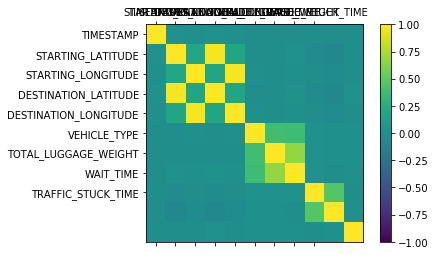

/home/harsha4148/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


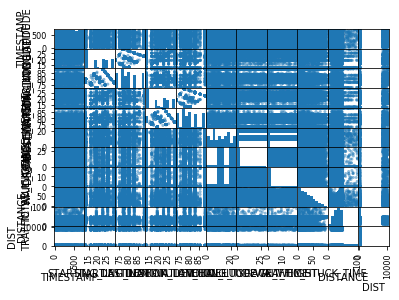

/home/harsha4148/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


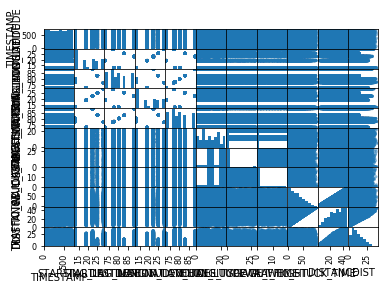

tree


In [10]:
#import graphviz
import xgboost as xgb
#from graphviz import Digraph
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBRegressor
clf=XGBRegressor()
clf.fit(X,y)
plt.figure(figsize=(20,15))
xgb.plot_importance(clf,ax=plt.gca())
plt.show()
print('train set')
data.hist()
plt.show()
print('test set')
data1.hist()
plt.show()
print('train set')
data.plot(kind='density', subplots=True, layout=(100,100), sharex=False)
plt.show()
data.plot(kind='box', subplots=True, layout=(100,100), sharex=False, sharey=False)
plt.show()
print('test set')
data1.plot(kind='density', subplots=True, layout=(100,100), sharex=False)
plt.show()
print('train set')
data.plot(kind='density', subplots=True, layout=(100,100), sharex=False)
plt.show()
data.plot(kind='box', subplots=True, layout=(100,100), sharex=False, sharey=False)
plt.show()
print('test set')
data1.plot(kind='box', subplots=True, layout=(100,100), sharex=False, sharey=False)
plt.show()
correlations = data.corr()
# plot correlation matrix
names=data1.columns.values
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data)
plt.show()
scatter_matrix(data1)
plt.show()
print("tree")
#xgb.plot_tree(clf,ax=plt.gca())
#plt.show()